In [50]:
# Importing  the reuired packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score,accuracy_score,confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE

In [51]:
# Importing the data
data=pd.read_csv('/content/TRAIN.csv')
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [52]:
# different columns in dataset
data.columns

Index(['Index', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

# **Data Processing and EDA**


In [54]:
# Total no. of cases present in each class
Total_cases =len(data)
nonfraud_count =len(data[data.Class == 0])
fraud_count =len(data[data.Class == 1])
print(f'Total no. of cases   {Total_cases}')
print(f'Total no. of fraud cases    {fraud_count}')
print(f'Total no. of Non_fraud cases    {nonfraud_count}')

Total no. of cases   284455
Total no. of fraud cases    440
Total no. of Non_fraud cases    284015


In [55]:
#Classifying the data as fraud and Non-fraud by assigning the class as 1 or 0
nonfraud_cases = data[data.Class == 0]
fraud_cases = data[data.Class == 1]
print("NonFraud Case Amount Statistics" )
print(nonfraud_cases.Amount.describe())
print("fraud_cases Amount Staticstics")
print(fraud_cases.Amount.describe())


NonFraud Case Amount Statistics
count    284015.000000
mean         88.313070
std         250.182582
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
fraud_cases Amount Staticstics
count     440.000000
mean      118.423773
std       245.493158
min         0.000000
25%         1.000000
50%         9.170000
75%       106.130000
max      2125.870000
Name: Amount, dtype: float64


In [56]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount']= sc.fit_transform(amount.reshape(-1,1))
print(data['Amount'].head(10))

0   -0.054400
1   -0.347672
2   -0.309419
3   -0.321051
4    0.346316
5   -0.237070
6   -0.315974
7   -0.229276
8   -0.287555
9   -0.241947
Name: Amount, dtype: float64


# **Feature Selection and Data split**




In [57]:
x = data.drop('Class',axis = 1).values
y = data['Class'].values
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size =0.2,random_state =0)

print(f'X_train_Sample  :   {X_train}') 
print(f'X_test_Sample   :   {y_test}')
print(f'Y_train_sample  :   {y_train}')
print(f'Y_test_sample   :   {y_test}')



X_train_Sample  :   [[ 6.75390000e+04  2.03290251e+00  8.72104658e-02 ... -2.68770997e-03
  -5.63309355e-02 -3.49190894e-01]
 [ 7.43990000e+04  1.42471913e+00 -6.40710760e-01 ... -2.80971140e-02
  -1.72212258e-02 -2.73244764e-01]
 [ 8.84200000e+04 -2.12968987e+00  1.32652086e+00 ...  6.81433878e-01
   4.51243274e-01  4.64884409e-02]
 ...
 [ 1.22579000e+05 -1.31066539e+00  1.62559754e+00 ... -6.24072031e-01
   4.29722435e-02 -3.53188058e-01]
 [ 1.52315000e+05 -1.01555239e+00 -7.96095303e-01 ...  4.91034029e-03
   5.18016397e-02 -2.92710956e-01]
 [ 1.17952000e+05  6.87872620e-01 -1.36790890e+00 ... -9.36404094e-02
   4.31728942e-02  8.64907915e-01]]
X_test_Sample   :   [0 0 0 ... 0 0 0]
Y_train_sample  :   [0 0 0 ... 0 0 0]
Y_test_sample   :   [0 0 0 ... 0 0 0]


# **Data Modeling & Evaluation of matrix**



In [58]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=55)
clf_rf.fit(X_train, y_train)
print(clf_rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)


In [59]:
y_pred=clf_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
[[56793     2]
 [   21    75]]
Accuracy of rf Model:
0.9995957181276476
Precision of rf Model:
0.974025974025974
Recall of rf Model:
0.78125
F1 Score of rf Model:
0.8670520231213873


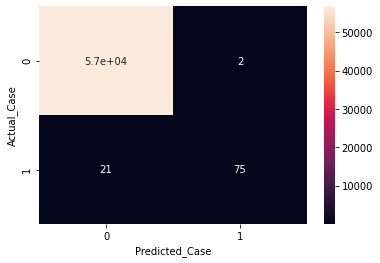

In [60]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of rf Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of rf Model:")
print (precision_score(y_test, y_pred))
print ("Recall of rf Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of rf Model:")
print (f1_score(y_test, y_pred))
confusion_matrix_data=pd.crosstab(y_test,y_pred,rownames=['Actual_Case'],colnames=['Predicted_Case'])
sns.heatmap(confusion_matrix_data,annot=True)

In [61]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=55)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=55, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
[[56784    11]
 [   17    79]]
Accuracy of rf Model:
0.9995078307640928
Precision of rf Model:
0.8777777777777778
Recall of rf Model:
0.8229166666666666
F1 Score of rf Model:
0.8494623655913979


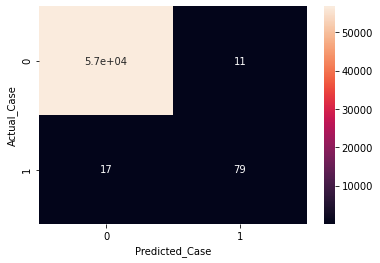

In [63]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of rf Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of rf Model:")
print (precision_score(y_test, y_pred))
print ("Recall of rf Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of rf Model:")
print (f1_score(y_test, y_pred))
confusion_matrix_data=pd.crosstab(y_test,y_pred,rownames=['Actual_Case'],colnames=['Predicted_Case'])
sns.heatmap(confusion_matrix_data,annot=True)

In [64]:
# Decision Tree Algorithim
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
[[56789     6]
 [   26    70]]
Accuracy of rf Model:
0.9994375208732489
Precision of rf Model:
0.9210526315789473
Recall of rf Model:
0.7291666666666666
F1 Score of rf Model:
0.8139534883720931


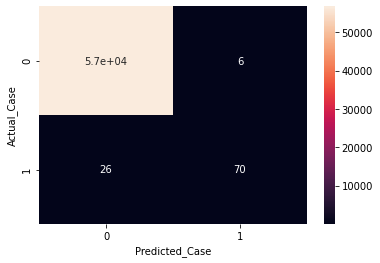

In [65]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_tree))
print("Accuracy of rf Model:")
print(accuracy_score(y_test, y_pred_tree))
print("Precision of rf Model:")
print (precision_score(y_test, y_pred_tree))
print ("Recall of rf Model:" )
print( recall_score(y_test, y_pred_tree))
print ("F1 Score of rf Model:")
print (f1_score(y_test, y_pred_tree))
confusion_matrix_data=pd.crosstab(y_test,y_pred_tree,rownames=['Actual_Case'],colnames=['Predicted_Case'])
sns.heatmap(confusion_matrix_data,annot=True)

In [66]:
# KNN Algorithim
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
y_pred_KN = knn.predict(X_test)
y_pred_KN

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
[[56795     0]
 [   96     0]]
Accuracy of rf Model:
0.9983125626197465
Precision of rf Model:
0.0
Recall of rf Model:
0.0
F1 Score of rf Model:
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


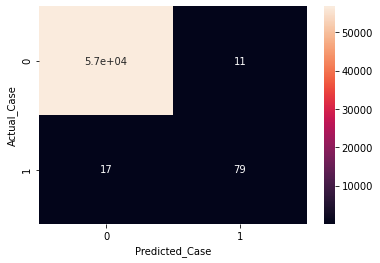

In [35]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_KN))
print("Accuracy of rf Model:")
print(accuracy_score(y_test, y_pred_KN))
print("Precision of rf Model:")
print (precision_score(y_test, y_pred_KN))
print ("Recall of rf Model:" )
print( recall_score(y_test, y_pred_KN))
print ("F1 Score of rf Model:")
print (f1_score(y_test, y_pred_KN))
confusion_matrix_data=pd.crosstab(y_test,y_pred,rownames=['Actual_Case'],colnames=['Predicted_Case'])
sns.heatmap(confusion_matrix_data,annot=True)

In [67]:
#Resampling of data as data was imbalanced using SMOTE
print("Label 1 before Resampling,: ", sum(y_train == 1)) 
print("Label 0 before Resampling: ", sum(y_train == 0)) 

sm = SMOTE(random_state = 3) 
X_train_sm, Y_train_sm = sm.fit_sample(X_train, y_train.ravel()) 
  
print('Shape of train_X after Resampling : ', X_train_sm.shape) 
print('Shape of train_Y after Reampling,: \n', Y_train_sm.shape) 
  
print("Label 1 after Resampling,: ", sum(Y_train_sm == 1)) 
print("Label 0 after Resampling: ", sum(Y_train_sm == 0)) 

Label 1 before Resampling,:  344
Label 0 before Resampling:  227220


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of train_X after Resampling :  (454440, 30)
Shape of train_Y after Reampling,: 
 (454440,)
Label 1 after Resampling,:  227220
Label 0 after Resampling:  227220


Accuracy: 0.9503787945369215


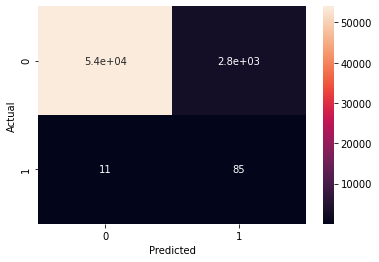

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56795
           1       0.03      0.89      0.06        96

    accuracy                           0.95     56891
   macro avg       0.51      0.92      0.52     56891
weighted avg       1.00      0.95      0.97     56891



In [71]:
#Classification using Logistic Regression after Resampling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_sm,Y_train_sm)
pred_lr_sm = logistic_regression.predict(X_test)
confusionmat_lr_sm = pd.crosstab(y_test,pred_lr_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_lr_sm, annot=True)
print('Accuracy:',accuracy_score(y_test,pred_lr_sm))
plt.show()
print(classification_report(y_test, pred_lr_sm)) 

Accuracy: 0.9995254082368037


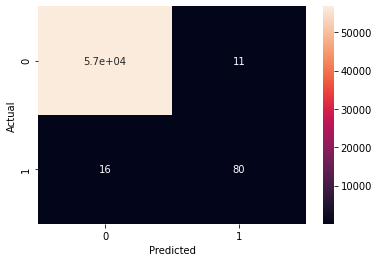

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56795
           1       0.88      0.83      0.86        96

    accuracy                           1.00     56891
   macro avg       0.94      0.92      0.93     56891
weighted avg       1.00      1.00      1.00     56891



In [69]:
#Classification using RandomForest Classifier after Resampling
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train_sm,Y_train_sm)
pred_rf_sm = Randomforest.predict(X_test)
confusionmat_rf_sm = pd.crosstab(y_test,pred_rf_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_rf_sm,annot=True)
print('Accuracy:',accuracy_score(y_test, pred_rf_sm))
plt.show()
print(classification_report(y_test, pred_rf_sm))

Accuracy: 0.9978731258019722


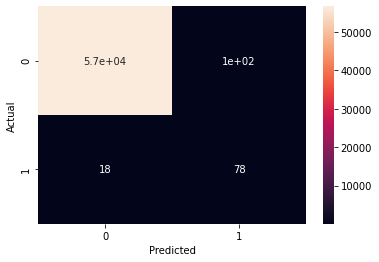

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56795
           1       0.43      0.81      0.56        96

    accuracy                           1.00     56891
   macro avg       0.72      0.91      0.78     56891
weighted avg       1.00      1.00      1.00     56891



In [70]:
#Classification using DecisionTree Classifier after Resampling
dt = DecisionTreeClassifier()
dt.fit(X_train_sm,Y_train_sm)
pred_dt_sm = dt.predict(X_test)
confusionmat_dt_sm = pd.crosstab(y_test,pred_dt_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_dt_sm,annot=True)
print('Accuracy:',accuracy_score(y_test, pred_dt_sm))
plt.show()
print(classification_report(y_test, pred_dt_sm)) 

Accuracy: 0.9978731258019722


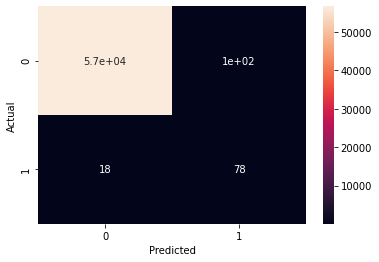

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56795
           1       0.43      0.81      0.56        96

    accuracy                           1.00     56891
   macro avg       0.72      0.91      0.78     56891
weighted avg       1.00      1.00      1.00     56891



In [73]:
#Classification using KNN Classifier after Resampling
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train_sm,Y_train_sm)
pred_dt_sm = dt.predict(X_test)
confusionmat_dt_sm = pd.crosstab(y_test,pred_dt_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_dt_sm,annot=True)
print('Accuracy:',accuracy_score(y_test, pred_dt_sm))
plt.show()
print(classification_report(y_test, pred_dt_sm)) 

In [74]:
# Test Dataset
fraud_test = pd.read_csv('/content/TEST[1].csv')

In [75]:
#prediction of test data on the trained model i.e. on random forest as its accuracy is more among all the trained model
final_predictions = clf_rf.predict(fraud_test)
predictions_data = pd.DataFrame(data=final_predictions, columns=["Class"])
predictions_data.head()

,Class
0,0
1,0
2,0
3,1
4,0


In [76]:
fraud_test_index = fraud_test[["Index"]].copy()
fraud_test_index.head()

,Index
0,0
1,1
2,2
3,3
4,4


In [77]:
final_data=pd.concat([fraud_test_index, predictions_data], axis=1, sort=True)
final_data.head()

,Index,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [78]:
#conversion of final predicted data into csv file
final_data.to_csv('/content/target_prediction.csv', index=False)